In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9 MB 30.8 MB/s 


In [ ]:
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [ ]:
window_center = -600
window_width = 1600

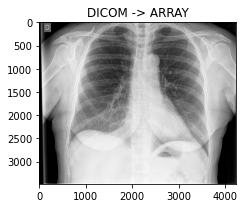

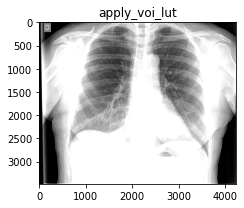

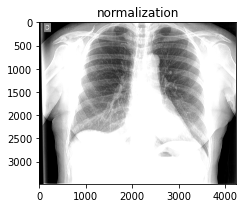

In [ ]:
dicom_path = '/content/3dcdfc352a06.dcm'
slice = pydicom.read_file(dicom_path)
# s = int(slice.RescaleSlope)
# b = int(slice.RescaleIntercept)
image = slice.pixel_array

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title('DICOM -> ARRAY')
plt.imshow(image, cmap='gray')

slice.WindowCenter = window_center
slice.WindowWidth = window_width
image_2 = apply_voi_lut(image, slice)
plt.figure(figsize=(12,12))
plt.subplot(1,3,2)
plt.title('apply_voi_lut')
plt.imshow(image_2, cmap = 'gray')

image_3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))
plt.figure(figsize=(12,12))
plt.subplot(1,3,3)
plt.title('normalization')
plt.imshow(image_3, cmap='gray')

plt.show()

In [ ]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

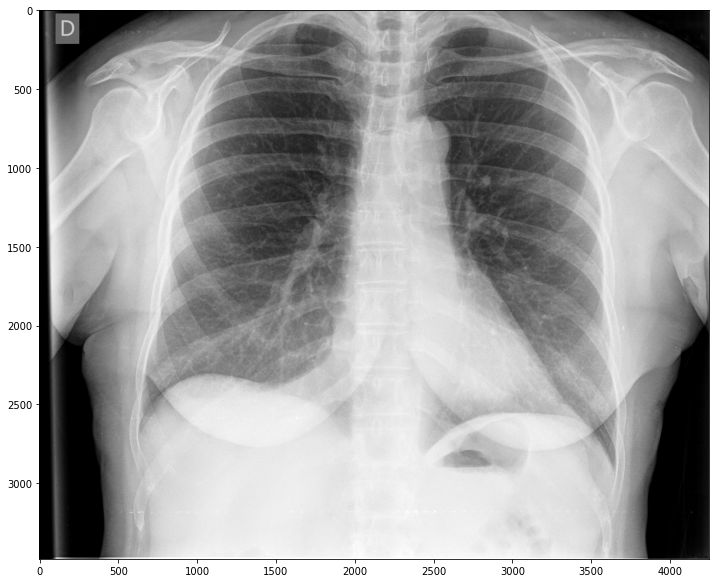

In [ ]:
img = read_xray('/content/3dcdfc352a06.dcm')
plt.figure(figsize=(12,12))
plt.imshow(img, 'gray')

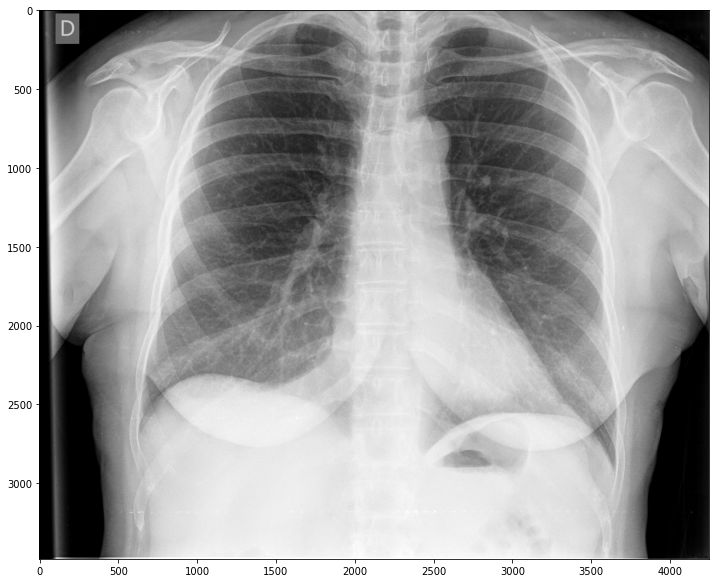

In [ ]:
img = read_xray('/content/3dcdfc352a06.dcm', fix_monochrome=False)
plt.figure(figsize=(12,12))
plt.imshow(img, 'gray')